**Task description**

The solution should have the following parts:<br>
**[20 %] Formalise the task and suggest the evaluation criterion**
- What is your target variable? Why is it a good measure of success and how the film-producing company can use it to make their decision?
- Which task are you going to solve (is it a regression, classification or something else)?
- Which metric will you use to evaluate the performance of the model? Do you have any idea, which values of the metrics can be considered good enough?

**[40 %] Explore and preprocess the data**
- Split data into train and test
- Fill missing values (if there are any)
- Remove irrelevant feature (if there are any) and create new ones (explore which features you have, what is their distribution and connection to the target, explain why newly created features are reasonable)
- Properly encode categorical features (if required)

**[40 %] Train the models and present result of your work**
- Use the models introduced during the course, which are relevant for the task you are solving
- You are supposed to compare at least 3 models
- Tune (or explain why there is no need to tune) hyperparameters of each model
- Use cross-validation to compare models and select hyperparameters
- Which model and setup is the best? How does it perform on the test dataset? 

**General Requirements**
- You should provide a solution in the form of the Jupyter Notebook. Code must be accompanied by markdown cells with explanations. 
- Make sure that the instructor can run all the cells to reproduce your results
- Clearly answer each question / perform required actions from the task
- Support all your statements with calculations and plots. 

For example: If you claim that the dataset does not have missing values, you need to provide code which shows that the total number of missing values is zero

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt

from IPython.display import display

This is a template for your final project. 

In [2]:
full_dataset = pd.read_csv('IMDb movies.csv')
full_dataset.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


In [3]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60198 entries, 0 to 60197
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          60198 non-null  object 
 1   title                  60198 non-null  object 
 2   original_title         60198 non-null  object 
 3   year                   60198 non-null  int64  
 4   date_published         60198 non-null  object 
 5   genre                  60198 non-null  object 
 6   duration               60198 non-null  int64  
 7   country                60193 non-null  object 
 8   language               59718 non-null  object 
 9   director               60174 non-null  object 
 10  writer                 59390 non-null  object 
 11  production_company     57454 non-null  object 
 12  actors                 60168 non-null  object 
 13  description            58205 non-null  object 
 14  avg_vote               60198 non-null  float64
 15  vo

We see that there are too any missing values in the income-related features, so we don't want to use them as our target varibles. Review-related and vote-related features looks good as potential targets.

In [4]:
full_dataset.describe().round(3)

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,60198.000,60198.000,60198.000,60198.000,8812.000,56129.000,51969.00
mean,1985.308,99.745,5.997,10491.501,55.532,44.927,27.27
std,23.308,22.753,1.199,56867.708,17.885,152.973,55.69
min,1906.000,40.000,1.000,100.000,1.000,1.000,1.00
25%,1970.000,88.000,5.400,206.000,43.000,4.000,3.00
50%,1992.000,95.000,6.200,503.000,56.000,10.000,8.00
75%,2005.000,107.000,6.800,2000.000,68.000,28.000,24.00
max,2019.000,729.000,10.000,2159628.000,100.000,7029.000,837.00


`votes`, `reviews_from_users`, `reviews_from_users` are likely to have outliers.

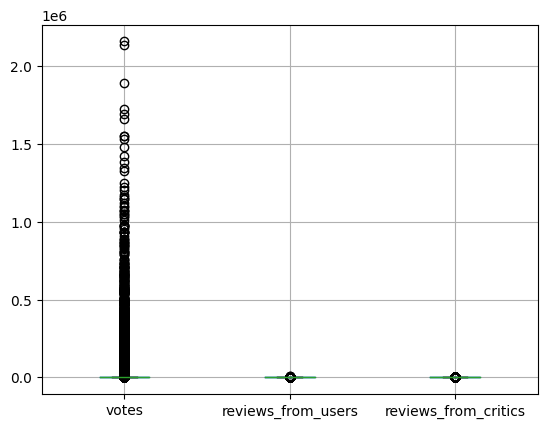

In [5]:
full_dataset[['votes', 'reviews_from_users', 'reviews_from_critics']].boxplot()
plt.show()

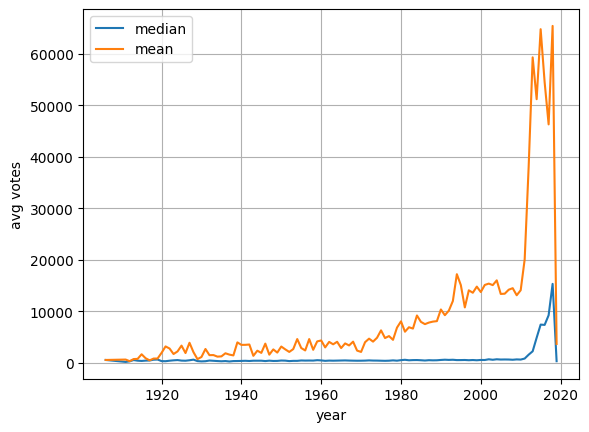

In [6]:
plt.plot(full_dataset.groupby('year')['votes'].median(), label='median')
plt.plot(full_dataset.groupby('year')['votes'].mean(), label='mean')
plt.xlabel('year')
plt.ylabel('avg votes')
plt.grid(True)
plt.legend()
plt.show()

We see that number of votes increase according to years, this can be explained by the fact that users who makes votes are watching newer movies.

We also see a sharp decline in the last year. most likely for the last year we have either incomplete data or data quality issues. You could try deleting the data for 2019

In [7]:
full_dataset.describe(exclude=['int64', 'float64'])

,imdb_title_id,title,original_title,date_published,genre,country,language,director,writer,production_company,actors,description,budget,usa_gross_income,worlwide_gross_income
count,60198,60198,60198,60198,60198,60193,59718,60174,59390,57454,60168,58205,16819,11892,19136
unique,60198,57284,57290,19431,1202,3318,3191,22771,47546,21441,60145,58126,3503,11529,18920
top,tt0000574,The Three Musketeers,The Three Musketeers,2010,Drama,USA,English,Michael Curtiz,Jing Wong,Metro-Goldwyn-Mayer (MGM),"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",Mail,$ 1000000,$ 1000000,$ 8144
freq,1,8,8,101,8498,22080,27008,86,70,1277,13,7,512,19,16


### Part 1.

Task formalization and Evaluation criteria

1.1 Select your target variable, explain your choice. Separate target variable from the feature matrix.

Suppose a movie is considered successful for a company's business if it has a lot of views, in our dataset we have a proxy for the number of views - `votes`.

Since we have a sample over a very long period of time and the difference between the number of votes by year is very different, we can group the votes by year and calculate the median. If the movie has more votes than the median, we consider the movie as successful.

In [8]:
df = full_dataset.merge(full_dataset.groupby('year')['votes'].median(),
                        on='year', how='left', suffixes=('', '_year_median'))
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,votes_year_median
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0,537.0
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0,158.0
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0,275.0


In [9]:
df['is_success'] = df['votes'] > df['votes_year_median']
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,votes_year_median,is_success
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0,537.0,False
1,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0,158.0,True
2,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0,275.0,True


1.2 Explain which task are you going to solve (is it a regression, classification or something else)? 

Since we have binary target, we will solve classification task.

1.3 Select a metric. Is it already implemented in sklearn? If yes, import it. If not, it is time to write a function which will calculate it. 

In [10]:
df['is_success'].value_counts()

is_success
False    30139
True     30059
Name: count, dtype: int64

Since we solve a classification task and our classes are balanced, as a metric we will use f1 score

In [11]:
from sklearn.metrics import f1_score

### Part 2.

Explore and preprocess the data

2.1 Split data into train and test

In [12]:
RANDOM_STATE = 42

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=RANDOM_STATE)
print(train.shape, test.shape)

(45148, 24) (15050, 24)


2.2 Explore you data: make plots, print tables. Make sure to write your observations.  Do not forget to fill-in missing values, define relevant columns transformatios. 


First, let's get rid of unnessesary features.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45148 entries, 27166 to 56422
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          45148 non-null  object 
 1   title                  45148 non-null  object 
 2   original_title         45148 non-null  object 
 3   year                   45148 non-null  int64  
 4   date_published         45148 non-null  object 
 5   genre                  45148 non-null  object 
 6   duration               45148 non-null  int64  
 7   country                45144 non-null  object 
 8   language               44780 non-null  object 
 9   director               45130 non-null  object 
 10  writer                 44549 non-null  object 
 11  production_company     43082 non-null  object 
 12  actors                 45127 non-null  object 
 13  description            43669 non-null  object 
 14  avg_vote               45148 non-null  float64
 15  vot

1. We have too many missing values in `budget`, `usa_gross_income`, `worlwide_gross_income`, `metascore`.
2. `imdb_title_id` - is useless feature.
3. `avg_vote` is a feature that logically closely related to `votes`, so I think that it will be some kind of leak if we will make predictions based on this feature.
4. `reviews_` features may also appear after watching movies, which we have as a target, so I think we should get rid of them.

In [15]:
drop_cols = ['budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users',
             'reviews_from_critics', 'imdb_title_id', 'avg_vote', 'votes_year_median', 'votes']
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)
train.head(3)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,is_success
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,1994-10-08,"Animation, Horror, Mystery",83,Japan,"Japanese, English",Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi",Akita Shoten,"Akio Ôtsuka, Hideyuki Hori, Kotono Mitsuishi, ...","A mysterious man attempts to save ""The Dark Si...",False
1616,Storm at Daybreak,Storm at Daybreak,1933,1933-07-14,"Drama, Romance, War",78,USA,English,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser",Metro-Goldwyn-Mayer (MGM),"Kay Francis, Nils Asther, Walter Huston, Phill...","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False
2864,It's in the Air,It's in the Air,1938,1939-02-27,"Comedy, Musical, War",87,UK,English,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins",Associated Talking Pictures (ATP),"George Formby, Polly Ward, Jack Hobbs, Garry M...",A case of mistaken identity leads to accident-...,False


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45148 entries, 27166 to 56422
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               45148 non-null  object
 1   original_title      45148 non-null  object
 2   year                45148 non-null  int64 
 3   date_published      45148 non-null  object
 4   genre               45148 non-null  object
 5   duration            45148 non-null  int64 
 6   country             45144 non-null  object
 7   language            44780 non-null  object
 8   director            45130 non-null  object
 9   writer              44549 non-null  object
 10  production_company  43082 non-null  object
 11  actors              45127 non-null  object
 12  description         43669 non-null  object
 13  is_success          45148 non-null  bool  
dtypes: bool(1), int64(2), object(11)
memory usage: 4.9+ MB


Let's preprocess `date_published`. We already have feature `year`, so I don't think we care what day the movie was published, but the month might be interesting.

In [17]:
train['date_published'] = pd.to_datetime(train.date_published, errors='coerce')
train['month_published'] = train.date_published.dt.month
train.drop(columns='date_published',  inplace=True)

test['date_published'] = pd.to_datetime(test.date_published, errors='coerce')
test['month_published'] = test.date_published.dt.month
test.drop(columns='date_published',  inplace=True)

In [18]:
train.describe()

,year,duration,month_published
count,45148.000000,45148.000000,42461.000000
mean,1985.311686,99.817844,6.636160
std,23.257827,22.718976,3.481023
min,1906.000000,40.000000,1.000000
25%,1970.000000,88.000000,4.000000
50%,1992.000000,96.000000,7.000000
75%,2005.000000,107.000000,10.000000
max,2019.000000,729.000000,12.000000


In [19]:
train.month_published.fillna(0, inplace=True)
test.month_published.fillna(0, inplace=True)

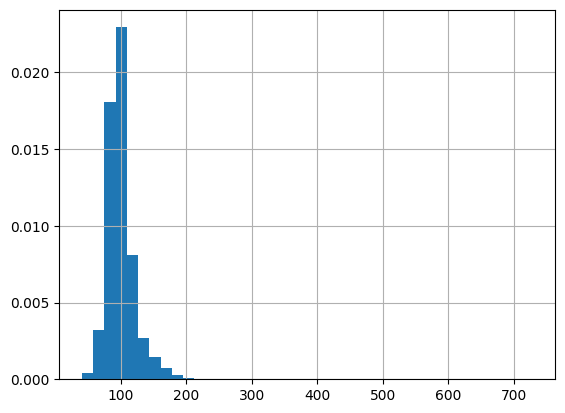

In [20]:
train['duration'].hist(bins=40, density=True)
plt.show()

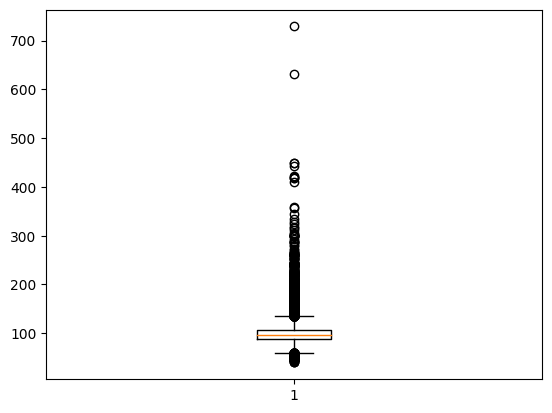

In [21]:
plt.boxplot(train['duration'])
plt.show()

Movies duration looks pretty realistic, so we don't need to preprocess it somehow.

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45148 entries, 27166 to 56422
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               45148 non-null  object 
 1   original_title      45148 non-null  object 
 2   year                45148 non-null  int64  
 3   genre               45148 non-null  object 
 4   duration            45148 non-null  int64  
 5   country             45144 non-null  object 
 6   language            44780 non-null  object 
 7   director            45130 non-null  object 
 8   writer              44549 non-null  object 
 9   production_company  43082 non-null  object 
 10  actors              45127 non-null  object 
 11  description         43669 non-null  object 
 12  is_success          45148 non-null  bool   
 13  month_published     45148 non-null  float64
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 4.9+ MB


In [23]:
train[train.title != train.original_title].head(3)

,title,original_title,year,genre,duration,country,language,director,writer,production_company,actors,description,is_success,month_published
25846,Infinitas,Beskonechnost,1992,Drama,206,Russia,Russian,Marlen Khutsiev,Marlen Khutsiev,Mosfilm,"Vladislav Pilnikov, Aleksei Zelenov, Marina Kh...","Reflecting on meaning of life, the hero of the...",False,6.0
21840,The Fugitives,Les fugitifs,1986,"Comedy, Crime, Drama",95,France,French,Francis Veber,Francis Veber,Fideline Films,"Pierre Richard, Gérard Depardieu, Jean Carmet,...",Jean is taken hostage at a bank by a foolish b...,True,12.0
10144,The American Beauty,La belle Américaine,1961,Comedy,104,France,French,"Robert Dhéry, Pierre Tchernia","Alfred Adam, Alfred Adam",Compagnie Commerciale Française Cinématographi...,"Alfred Adam, Colette Brosset, Robert Burnier, ...","Marcel, a simple-minded factory worker, is tri...",True,9.0


Let's preprocess production_company feature.

In [24]:
train.production_company.value_counts()

production_company
Metro-Goldwyn-Mayer (MGM)    970
Warner Bros.                 843
Paramount Pictures           639
Twentieth Century Fox        621
Columbia Pictures            603
                            ... 
Medienfonds GFP                1
Broad Reach Properties         1
Modern Artists                 1
Elysian Films                  1
Becker Films                   1
Name: count, Length: 17562, dtype: int64

In [25]:
train.production_company.value_counts().describe()

count    17562.000000
mean         2.453137
std         14.612883
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        970.000000
Name: count, dtype: float64

The major part is unique companies. So, let's single out the big companies and label the rest as 'Other'.

In [26]:
train.production_company.value_counts()[:20]

production_company
Metro-Goldwyn-Mayer (MGM)                970
Warner Bros.                             843
Paramount Pictures                       639
Twentieth Century Fox                    621
Columbia Pictures                        603
Universal Pictures                       505
RKO Radio Pictures                       389
Universal International Pictures (UI)    214
Mosfilm                                  209
Canal+                                   173
New Line Cinema                          146
Republic Pictures (I)                    141
Shaw Brothers                            120
First National Pictures                  114
Walt Disney Productions                  111
Toho Company                             108
CJ Entertainment                         100
Golden Harvest Company                    97
Lenfilm Studio                            97
Touchstone Pictures                       95
Name: count, dtype: int64

In [27]:
big_companies = train.production_company.value_counts()[train.production_company.value_counts() > 200].index
train.production_company.where(train.production_company.isin(big_companies), other='Other', inplace=True)
train = pd.concat([train, train.production_company.str.get_dummies()], axis=1)
train.drop(columns='production_company', inplace=True)
train.head()

,title,original_title,year,genre,duration,country,language,director,writer,actors,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,"Animation, Horror, Mystery",83,Japan,"Japanese, English",Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi","Akio Ôtsuka, Hideyuki Hori, Kotono Mitsuishi, ...","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0
1616,Storm at Daybreak,Storm at Daybreak,1933,"Drama, Romance, War",78,USA,English,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser","Kay Francis, Nils Asther, Walter Huston, Phill...","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0
2864,It's in the Air,It's in the Air,1938,"Comedy, Musical, War",87,UK,English,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins","George Formby, Polly Ward, Jack Hobbs, Garry M...",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0
252,Scherben,Scherben,1921,Drama,50,Germany,German,Lupu Pick,"Carl Mayer, Lupu Pick","Werner Krauss, Edith Posca, Hermine Straßmann-...","Set during the winter, the story tells the tal...",False,5.0,0,0,0,1,0,0,0,0,0,0
16625,The Spiral Staircase,The Spiral Staircase,1975,"Horror, Mystery, Thriller",89,UK,English,Peter Collinson,"Chris Bryant, Allan Scott","Jacqueline Bisset, Christopher Plummer, John P...",Helen has been incapable of speech since seein...,False,11.0,0,0,0,1,0,0,0,0,0,0


Moving on to `genre`

In [28]:
train.genre.value_counts()

genre
Drama                            6406
Comedy                           4051
Comedy, Drama                    1979
Drama, Romance                   1893
Comedy, Romance                  1305
                                 ... 
Mystery, Comedy, Drama              1
Action, Horror, War                 1
Animation, Drama, War               1
Horror, Drama, Thriller             1
Animation, Musical, Adventure       1
Name: count, Length: 1114, dtype: int64

In [29]:
set(train.genre.str.split(', ').explode().values)

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [30]:
train.genre.str.split(', ').explode().value_counts()

genre
Drama          24868
Comedy         15637
Romance         7797
Action          6708
Crime           6310
Thriller        5385
Horror          4537
Adventure       4251
Mystery         2620
Fantasy         2046
Family          2005
Sci-Fi          1936
War             1408
Musical         1292
History         1221
Biography       1166
Western         1092
Animation        996
Music            904
Sport            557
Film-Noir        501
Adult              2
Documentary        2
Reality-TV         2
Name: count, dtype: int64

Let's make each genre as binary feature.

In [31]:
minor_genres = ['Sport', 'Film-Noir', 'Adult', 'Reality-TV', 'Documentary']

set(train.genre.str.split(', ').explode().unique()).difference(minor_genres)

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [32]:
minor_genres = ['Sport', 'Film-Noir', 'Adult', 'Reality-TV', 'Documentary']
major_genres = list(set(train.genre.str.split(', ').explode().unique()).difference(minor_genres))
train = pd.concat([train.drop(columns='genre'), train.genre.str.get_dummies(sep=', ')], axis=1)
train['Other_genre'] = train[minor_genres].max(axis=1)
train.drop(columns=minor_genres, inplace=True)
train.head(3)

,title,original_title,year,duration,country,language,director,writer,actors,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Other_genre
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,Japan,"Japanese, English",Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi","Akio Ôtsuka, Hideyuki Hori, Kotono Mitsuishi, ...","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1616,Storm at Daybreak,Storm at Daybreak,1933,78,USA,English,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser","Kay Francis, Nils Asther, Walter Huston, Phill...","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2864,It's in the Air,It's in the Air,1938,87,UK,English,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins","George Formby, Polly Ward, Jack Hobbs, Garry M...",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Move on to `language`

In [33]:
train.language.value_counts()

language
English                                    20229
French                                      2266
Italian                                     1659
Japanese                                    1422
Spanish                                     1356
                                           ...  
Zulu, English                                  1
Japanese, Swedish                              1
German, English, Spanish, French, Greek        1
German, Latin                                  1
German, Dutch                                  1
Name: count, Length: 2578, dtype: int64

In [34]:
len(set(train.language.str.split(', ').explode().values))

231

231 languages...

In [35]:
train.language.str.split(', ').explode().value_counts()[:20]

language
English       26451
French         4594
Spanish        2868
Italian        2823
German         2516
Japanese       2015
Hindi          1478
Russian        1458
Cantonese       975
Mandarin        941
Portuguese      662
Turkish         659
Swedish         598
Korean          539
Arabic          517
Polish          483
Danish          468
Greek           466
Dutch           412
Czech           366
Name: count, dtype: int64

Let's do the trick as with `production_company`.

In [36]:
popular_languages = train.language.str.split(', ').explode().value_counts()[:10].index
popular_languages

Index(['English', 'French', 'Spanish', 'Italian', 'German', 'Japanese',
       'Hindi', 'Russian', 'Cantonese', 'Mandarin'],
      dtype='object', name='language')

In [37]:
other_languages = train.language.str.split(', ').explode().value_counts()[10:].index

In [38]:
languages_ohe = train.language.str.get_dummies(sep=', ')
languages_ohe['Other_lang'] = languages_ohe[other_languages].max(axis=1)
languages_ohe.drop(columns=other_languages, inplace=True)
languages_ohe.head()

,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang
27166,0,1,0,0,0,0,1,0,0,0,0
1616,0,1,0,0,0,0,0,0,0,0,0
2864,0,1,0,0,0,0,0,0,0,0,0
252,0,0,0,1,0,0,0,0,0,0,0
16625,0,1,0,0,0,0,0,0,0,0,0


In [39]:
train = pd.concat([train, languages_ohe], axis=1)
train.drop(columns='language', inplace=True)
train.head()

,title,original_title,year,duration,country,director,writer,actors,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,...,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Other_genre,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,Japan,Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi","Akio Ôtsuka, Hideyuki Hori, Kotono Mitsuishi, ...","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1616,Storm at Daybreak,Storm at Daybreak,1933,78,USA,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser","Kay Francis, Nils Asther, Walter Huston, Phill...","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2864,It's in the Air,It's in the Air,1938,87,UK,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins","George Formby, Polly Ward, Jack Hobbs, Garry M...",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
252,Scherben,Scherben,1921,50,Germany,Lupu Pick,"Carl Mayer, Lupu Pick","Werner Krauss, Edith Posca, Hermine Straßmann-...","Set during the winter, the story tells the tal...",False,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
16625,The Spiral Staircase,The Spiral Staircase,1975,89,UK,Peter Collinson,"Chris Bryant, Allan Scott","Jacqueline Bisset, Christopher Plummer, John P...",Helen has been incapable of speech since seein...,False,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Move on to `country`

In [40]:
train.country.value_counts()

country
USA                                  16557
India                                 2285
UK                                    2190
France                                1773
Japan                                 1582
                                     ...  
USA, France, Japan                       1
France, Belgium, Estonia                 1
USA, Japan, Italy                        1
Poland, Ukraine, Germany                 1
UK, USA, Australia, Japan, France        1
Name: count, Length: 2695, dtype: int64

In [41]:
len(set(train.country.str.split(', ').explode().values))

163

Better than `language`

In [42]:
train.country.str.split(', ').explode().value_counts()[:10]

country
USA          19765
France        4615
UK            4168
Italy         3124
India         2399
Germany       1923
Japan         1912
Canada        1801
Spain         1536
Hong Kong     1164
Name: count, dtype: int64

In [43]:
major_countries = train.country.str.split(', ').explode().value_counts()[:10].index
major_countries

Index(['USA', 'France', 'UK', 'Italy', 'India', 'Germany', 'Japan', 'Canada',
       'Spain', 'Hong Kong'],
      dtype='object', name='country')

In [44]:
other_countries = train.country.str.split(', ').explode().value_counts()[10:].index
other_countries

Index(['West Germany', 'Sweden', 'Australia', 'Soviet Union', 'Turkey',
       'Denmark', 'Mexico', 'South Korea', 'Belgium', 'Netherlands',
       ...
       'Guinea-Bissau', 'Kosovo', 'Fiji', 'Niger', 'Cape Verde',
       'North Vietnam', 'New Caledonia', 'Zaire', 'Syria',
       'Trinidad and Tobago'],
      dtype='object', name='country', length=152)

In [45]:
country_ohe = train.country.str.get_dummies(sep=', ')
country_ohe['Other_country'] = country_ohe[other_countries].max(axis=1)
country_ohe.drop(columns=other_countries, inplace=True)
country_ohe.head()

,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country
27166,0,0,0,0,0,0,1,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,1,0
2864,0,0,0,0,0,0,0,0,1,0,0
252,0,0,1,0,0,0,0,0,0,0,0
16625,0,0,0,0,0,0,0,0,1,0,0


In [46]:
train = pd.concat([train, country_ohe], axis=1)
train.drop(columns='country', inplace=True)
train.head()

,title,original_title,year,duration,director,writer,actors,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,...,War,Western,Other_genre,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi","Akio Ôtsuka, Hideyuki Hori, Kotono Mitsuishi, ...","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1616,Storm at Daybreak,Storm at Daybreak,1933,78,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser","Kay Francis, Nils Asther, Walter Huston, Phill...","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2864,It's in the Air,It's in the Air,1938,87,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins","George Formby, Polly Ward, Jack Hobbs, Garry M...",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
252,Scherben,Scherben,1921,50,Lupu Pick,"Carl Mayer, Lupu Pick","Werner Krauss, Edith Posca, Hermine Straßmann-...","Set during the winter, the story tells the tal...",False,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
16625,The Spiral Staircase,The Spiral Staircase,1975,89,Peter Collinson,"Chris Bryant, Allan Scott","Jacqueline Bisset, Christopher Plummer, John P...",Helen has been incapable of speech since seein...,False,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


`actors`'s time

In [47]:
train.actors.str.split(', ').explode().value_counts()[:10]

actors
Brahmanandam        159
Anupam Kher         124
Christopher Lee     116
Gérard Depardieu    113
Henry O'Neill       108
John Carradine      107
Gulshan Grover      103
Amitabh Bachchan    101
Anthony Quinn        96
John Wayne           94
Name: count, dtype: int64

In [48]:
train[train['is_success']].actors.str.split(', ').explode().value_counts()[:10]

actors
Christopher Lee     92
Gérard Depardieu    85
John Carradine      79
John Wayne          78
Anupam Kher         75
Amitabh Bachchan    74
Michael Caine       74
Anthony Quinn       73
Bette Davis         70
Henry O'Neill       66
Name: count, dtype: int64

In [49]:
actor_success = (train.actors.str.split(', ').explode().to_frame()
                     .merge(train.is_success.to_frame(), left_index=True, right_index=True))
actor_success.head()

,actors,is_success
0,Elizabeth Tait,False
0,John Tait,False
0,Norman Campbell,False
0,Bella Cola,False
0,Will Coyne,False


In [50]:
actor_success['is_fail'] = actor_success['is_success'] == False
actor_success_fail = actor_success.groupby('actors').sum()
actor_success_fail.head()

,is_success,is_fail
actors,,
'Astor' Escobar,1,0
'Baby' Carmen De Rue,2,0
'Bang Bang' Toto Ruta,1,0
'Big Jack' Provan,1,0
'Big Walter' Price,1,0


In [51]:
actor_success_fail['total'] = actor_success_fail[['is_success', 'is_fail']].sum(axis=1)
actor_success_fail['success_share'] = actor_success_fail['is_success'] / actor_success_fail['total']
actor_success_fail.sort_values(['success_share', 'total'], ascending=[False, False]).head(20)

,is_success,is_fail,total,success_share
actors,,,,
Bette Davis,70,0,70,1.0
Kemal Sunal,62,0,62,1.0
James Stewart,57,0,57,1.0
Bruce Willis,48,0,48,1.0
Paul Newman,46,0,46,1.0
Morgan Freeman,45,0,45,1.0
Ed Harris,42,0,42,1.0
Gregory Peck,41,0,41,1.0
Nicolas Cage,41,0,41,1.0


In [52]:
successful_actors = actor_success_fail[(actor_success_fail['success_share'] > 0.90) &
                                       (actor_success_fail['total'] > 30)].index.values
successful_actors

array(['Aidan Quinn', 'Al Pacino', 'Alec Baldwin', 'Alec Guinness',
       'Anthony Hopkins', 'Barbara Stanwyck', 'Ben Affleck',
       'Ben Kingsley', 'Ben Stiller', 'Bette Davis', 'Bill Paxton',
       'Bruce Willis', 'Burt Lancaster', 'Charles Bronson',
       'Charlie Sheen', 'Charlton Heston', 'Chevy Chase',
       'Christian Slater', 'Christina Ricci', 'Christopher Walken',
       'Clark Gable', 'Clint Eastwood', 'Colin Firth', 'Dan Aykroyd',
       'Dan Hedaya', 'Danny DeVito', 'David Morse', 'Dean Martin',
       'Dennis Quaid', 'Dolph Lundgren', 'Drew Barrymore',
       'Dustin Hoffman', 'Ed Harris', 'Elizabeth Taylor',
       'Forest Whitaker', 'Frank Sinatra', 'Gary Cooper', 'Gary Oldman',
       'Gene Hackman', 'Gregory Peck', 'Harrison Ford', 'Helen Mirren',
       'Helena Bonham Carter', 'Henry Fonda', 'Humphrey Bogart',
       'Ian Holm', 'J.K. Simmons', 'Jack Lemmon', 'Jack Nicholson',
       'James Caan', 'James Cagney', 'James Garner', 'James Rebhorn',
       'James S

In [53]:
def n_successfull_actors(actor_cell):
    if isinstance(actor_cell, str):
        actors = set(actor_cell.split(', '))
        intersect = actors.intersection(successful_actors)
        n_successfull_actors = len(intersect)
        return n_successfull_actors
    else:
        return -1

In [54]:
train['n_successfull_actors'] = train.actors.apply(n_successfull_actors)
train.drop(columns='actors', inplace=True)
train.head(3)

,title,original_title,year,duration,director,writer,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,Crime,...,Western,Other_genre,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country,n_successfull_actors
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,Nobuyasu Furukawa,"Yuho Ashibe, Hideyuki Kikuchi","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1616,Storm at Daybreak,Storm at Daybreak,1933,78,Richard Boleslawski,"Sándor Hunyady, Bertram Millhauser","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2864,It's in the Air,It's in the Air,1938,87,Anthony Kimmins,"Anthony Kimmins, Anthony Kimmins",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


`director`

In [55]:
train.director.unique().shape

(19057,)

In [56]:
director_success = train[['director', 'is_success']]
director_success['is_fail'] = director_success['is_success'] == False
director_success = director_success.groupby('director').sum()
director_success['total']  = director_success['is_success'] + director_success['is_fail']
director_success['share_success'] = director_success['is_success'] / director_success['total']
director_success.sort_values(['share_success', 'total'], ascending=[False, False]).head(20)

/var/folders/6f/4853zw_d03l3c75kmv4b7b2m0000gn/T/ipykernel_14496/538552415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  director_success['is_fail'] = director_success['is_success'] == False


,is_success,is_fail,total,share_success
director,,,,
Alfred Hitchcock,36,0,36,1.0
Sidney Lumet,34,0,34,1.0
Clint Eastwood,27,0,27,1.0
Ingmar Bergman,26,0,26,1.0
Vincente Minnelli,24,0,24,1.0
Woody Allen,24,0,24,1.0
Akira Kurosawa,23,0,23,1.0
Luis Buñuel,23,0,23,1.0
Robert Altman,23,0,23,1.0


In [57]:
successful_directors = director_success[(director_success['share_success'] > 0.9) &
                                        (director_success['total'] > 10)].index.values
successful_directors

array(['Abel Ferrara', 'Aki Kaurismäki', 'Akira Kurosawa',
       'Alain Resnais', 'Albert Pyun', 'Alfred Hitchcock',
       'André Téchiné', 'Arthur Hiller', 'Arthur Penn', 'Barry Levinson',
       'Bernardo Bertolucci', 'Bertrand Blier', 'Billy Wilder',
       'Brian De Palma', 'Bryan Forbes', 'Carl Reiner', 'Charles Walters',
       'Chris Columbus', 'Claude Miller', 'Clint Eastwood',
       'Costa-Gavras', 'Dario Argento', 'David Cronenberg', 'David Lean',
       'Delbert Mann', 'Don Siegel', 'Elia Kazan', 'Federico Fellini',
       'Francesco Rosi', 'Francis Ford Coppola', 'François Truffaut',
       'Fred Schepisi', 'Fred Zinnemann', 'Fritz Lang', 'Garry Marshall',
       'George A. Romero', 'George Cukor', 'George Roy Hill',
       'George Stevens', 'Gus Van Sant', 'Ingmar Bergman',
       'Irving Rapper', 'Ivan Reitman', 'Jean-Luc Godard',
       'Jean-Pierre Melville', 'Joel Schumacher', 'John Boorman',
       'John Carpenter', 'John Frankenheimer', 'John G. Avildsen',
       

In [58]:
train['is_successful_director'] = train.director.isin(successful_directors)
train.drop(columns='director', inplace=True)
train['is_successful_director'].value_counts()

is_successful_director
False    43205
True      1943
Name: count, dtype: int64

In [59]:
train.head()

,title,original_title,year,duration,writer,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Other_genre,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country,n_successfull_actors,is_successful_director
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,"Yuho Ashibe, Hideyuki Kikuchi","A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False
1616,Storm at Daybreak,Storm at Daybreak,1933,78,"Sándor Hunyady, Bertram Millhauser","Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False
2864,It's in the Air,It's in the Air,1938,87,"Anthony Kimmins, Anthony Kimmins",A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False
252,Scherben,Scherben,1921,50,"Carl Mayer, Lupu Pick","Set during the winter, the story tells the tal...",False,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False
16625,The Spiral Staircase,The Spiral Staircase,1975,89,"Chris Bryant, Allan Scott",Helen has been incapable of speech since seein...,False,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False


In [60]:
train.shape

(45148, 62)

`writer`

In [61]:
train.writer.unique().shape

(36908,)

In [62]:
train.writer.str.split(', ').explode().value_counts()

writer
Jing Wong              72
Kuang Ni               70
Jesús Franco           69
William Shakespeare    50
Robin Bhatt            49
                       ..
Mohit Suri              1
Francesco Giammusso     1
Montagu Slater          1
Jean-Luc Levesque       1
Günter Vaessen          1
Name: count, Length: 35671, dtype: int64

In [63]:
writer_success = (train.writer.str.split(', ').explode().to_frame()
                     .merge(train.is_success.to_frame(), left_index=True, right_index=True))
writer_success.head()

,writer,is_success
0,Charles Tait,False
1,Urban Gad,True
1,Gebhard Schätzler-Perasini,True
2,Victorien Sardou,True
3,Dante Alighieri,True


In [64]:
writer_success['is_fail'] = writer_success['is_success'] == False
writer_success_fail = writer_success.groupby('writer').sum()
writer_success_fail['total'] = writer_success_fail[['is_success', 'is_fail']].sum(axis=1)
writer_success_fail['success_share'] = writer_success_fail['is_success'] / writer_success_fail['total']
writer_success_fail.sort_values(['success_share', 'total'], ascending=[False, False]).head(20)

,is_success,is_fail,total,success_share
writer,,,,
Stephen King,38,0,38,1.0
Woody Allen,29,0,29,1.0
Neil Simon,27,0,27,1.0
John Hughes,24,0,24,1.0
François Truffaut,23,0,23,1.0
Pedro Almodóvar,20,0,20,1.0
William Goldman,20,0,20,1.0
David Mamet,19,0,19,1.0
John Carpenter,17,0,17,1.0


In [65]:
successful_writers = writer_success_fail[(writer_success_fail['success_share'] > 0.9) &
                                         (writer_success_fail['total'] > 10)].index.values
successful_writers

array(['A.R. Murugadoss', 'Adam Rifkin', 'Aditya Chopra',
       'Akira Toriyama', 'Alan Jay Lerner', 'Alan Rudolph',
       'Alvin Sargent', 'Anders Thomas Jensen', 'Anthony Hinds',
       'Arthur Conan Doyle', 'Barry Levinson', 'Benjamin Glazer',
       'Bernardo Bertolucci', 'Billy Wilder', 'Brad Mirman',
       'Brian De Palma', 'Brian Garfield', 'Brian Helgeland',
       'Buck Henry', 'Clive Barker', 'David Cronenberg', 'David Koepp',
       'David Mamet', 'Dennis Shryack', 'Eric Ambler', 'Eric Roth',
       'Ernest Hemingway', 'Ethan Coen', 'Everett De Roche',
       'Francis Ford Coppola', 'Frank S. Nugent', 'Frank Tashlin',
       'François Ozon', 'François Truffaut', 'George A. Romero',
       'George Lucas', 'Gosho Aoyama', 'Harold Pinter', 'Harry Kleiner',
       'Hayao Miyazaki', 'I.A.L. Diamond', 'Ingmar Bergman',
       'Isobel Lennart', 'Jack Hill', 'Jackie Chan', 'Jean-Luc Godard',
       'Jean-Pierre Melville', 'Jim Wynorski', 'Joel Coen',
       'John Carpenter', 'Joh

In [66]:
def n_successful_writers(writers):
    if isinstance(writers, str):
        return len(set(writers.split(', ')).intersection(successful_writers))
    else:
        return -1

In [67]:
train['n_successful_writers'] = train.writer.apply(n_successful_writers)
train.drop(columns='writer', inplace=True)
train['n_successful_writers'].value_counts()

n_successful_writers
 0    43213
 1     1283
-1      599
 2       53
Name: count, dtype: int64

In [68]:
train.head()

,title,original_title,year,duration,description,is_success,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,...,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country,n_successfull_actors,is_successful_director,n_successful_writers
27166,Dâkusaido burûsu,Dâkusaido burûsu,1994,83,"A mysterious man attempts to save ""The Dark Si...",False,10.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,False,0
1616,Storm at Daybreak,Storm at Daybreak,1933,78,"Sarajevo June 28, 1914. Dushan, the Serbian ma...",False,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,False,0
2864,It's in the Air,It's in the Air,1938,87,A case of mistaken identity leads to accident-...,False,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,0
252,Scherben,Scherben,1921,50,"Set during the winter, the story tells the tal...",False,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False,0
16625,The Spiral Staircase,The Spiral Staircase,1975,89,Helen has been incapable of speech since seein...,False,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,False,0


Pre-processing `title`, `original_title` and `description` looks like a dive into NLP, so in this project I will allow myself to drop those features.

In [69]:
train.drop(columns=['title', 'original_title', 'description'], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45148 entries, 27166 to 56422
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   45148 non-null  int64  
 1   duration                               45148 non-null  int64  
 2   is_success                             45148 non-null  bool   
 3   month_published                        45148 non-null  float64
 4   Columbia Pictures                      45148 non-null  int64  
 5   Metro-Goldwyn-Mayer (MGM)              45148 non-null  int64  
 6   Mosfilm                                45148 non-null  int64  
 7   Other                                  45148 non-null  int64  
 8   Paramount Pictures                     45148 non-null  int64  
 9   RKO Radio Pictures                     45148 non-null  int64  
 10  Twentieth Century Fox                  45148 non-null  int64  
 11  Uni

In [70]:
train.describe()

,year,duration,month_published,Columbia Pictures,Metro-Goldwyn-Mayer (MGM),Mosfilm,Other,Paramount Pictures,RKO Radio Pictures,Twentieth Century Fox,Universal International Pictures (UI),Universal Pictures,Warner Bros.,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,...,Other_genre,Cantonese,English,French,German,Hindi,Italian,Japanese,Mandarin,Russian,Spanish,Other_lang,Canada,France,Germany,Hong Kong,India,Italy,Japan,Spain,UK,USA,Other_country,n_successfull_actors,n_successful_writers
count,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,...,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000,45148.000000
mean,1985.311686,99.817844,6.241207,0.013356,0.021485,0.004629,0.889408,0.014153,0.008616,0.013755,0.004740,0.011185,0.018672,0.148578,0.094157,0.022061,0.025826,0.346350,0.139763,0.550811,0.044409,0.045318,0.027044,0.100492,0.020023,...,0.023368,0.021596,0.585873,0.101754,0.055728,0.032737,0.062528,0.044631,0.020843,0.032294,0.063524,0.218880,0.039891,0.102219,0.042593,0.025782,0.053136,0.069195,0.042350,0.034021,0.092319,0.437782,0.280743,0.107934,0.017498
std,23.257827,22.718976,3.723086,0.114795,0.144996,0.067881,0.313629,0.118125,0.092423,0.116473,0.068685,0.105169,0.135365,0.355676,0.292050,0.146883,0.158618,0.475812,0.346744,0.497417,0.206005,0.208002,0.162215,0.300658,0.140081,...,0.151070,0.145361,0.492576,0.302328,0.229398,0.177949,0.242114,0.206495,0.142859,0.176781,0.243906,0.413492,0.195705,0.302940,0.201941,0.158486,0.224308,0.253788,0.201388,0.181286,0.289478,0.496119,0.449367,0.385147,0.214652
min,1906.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,1970.000000,88.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1992.000000,96.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,107.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2019.000000,729.000000,1

In [71]:
X_train = train.drop(columns='is_success')
y_train = train['is_success'].apply(int)

X_test = test.drop(columns='is_success')
y_test = test['is_success'].apply(int)

### Part 3.

Train and compare the models

3.1. Select models, you are going to train, select hyperparameters that have to be tunes.

In [72]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [73]:
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],  # [0.001, 0.05, 0.08, 0.1, 0.12, 0.16, 0.4],
    'n_estimators': [100, 300, 500],  # [150, 250, 300, 350, 600], 
    'subsample': [0.7, 0.8, 0.9],  # [0.3, 0.65, 0.7, 0.75, 0.9, 1.0],  
    'reg_alpha': [0.01, 0.1, 0.3],  # [0.01, 0.25, 0.3, 0.35, 0.7],
}

xgbc = XGBClassifier(random_state=RANDOM_STATE, eval_metric=f1_score)

In [74]:
rf_param_grid = {
    'n_estimators': [200, 400, 600],  # [100, 200, 300, 400, 500]
    # 'max_depth': [None, 3, 9, 15],  # [None, 10, 20, 30, 50]
    'min_samples_split': [12, 24, 36],  # [2, 3, 4, 6, 8, 10, 11, 15, 20, 24, 32],
    'min_samples_leaf': [1, 2],  # [1, 2, 3, 4, 5],
    'max_features': ['sqrt'],  # [None, 'sqrt']
    # 'bootstrap': [True, False],
    'class_weight': ['balanced'],  # [None, 'balanced']
    'criterion': ['gini'],
}

rf = RandomForestClassifier(random_state=RANDOM_STATE)

In [75]:
dt_param_grid = {
    'max_depth': [8, 10, 11, 12, 16],  # [None, 8, 10, 12, 16, 20, 40]
    'min_samples_split': np.arange(2, 13, 2),
    'min_samples_leaf': np.arange(2, 13, 2),
    'max_features': [None],  # ['sqrt', None],
    'criterion': ['entropy'],  # ['gini', 'entropy']
    'class_weight': ['balanced', None]
}

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

3.2 Use cross-validation to compare models and select best set of hyperparameters

In [76]:
gs_xgb = GridSearchCV(xgbc, xgb_param_grid, scoring='f1', verbose=1, n_jobs=-1, cv=3)
gs_xgb.fit(X_train, y_train)
print('Best_score:', gs_xgb.best_score_)
print('Best params:', gs_xgb.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best_score: 0.7072982210210753
Best params: {'learning_rate': 0.1, 'n_estimators': 300, 'reg_alpha': 0.3, 'subsample': 0.7}


Best_score: 0.7070555061459532

Best params: {'learning_rate': 0.1, 'n_estimators': 300, 'reg_alpha': 0.3, 'subsample': 0.7}

In [77]:
gs_rf = GridSearchCV(rf, rf_param_grid, scoring='f1', verbose=1, n_jobs=-1, cv=2)
gs_rf.fit(X_train, y_train)
print('Best_score:', gs_rf.best_score_)
print('Best params:', gs_rf.best_params_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
Best_score: 0.6989211398201014
Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 600}


Best_score: 0.6989211398201014

Best params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 600}

In [78]:
gs_dt = GridSearchCV(dt, dt_param_grid, scoring='f1', verbose=1, n_jobs=-1, cv=3)
gs_dt.fit(X_train, y_train)
print('Best_score:', gs_dt.best_score_)
print('Best params:', gs_dt.best_params_)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best_score: 0.6670193192343298
Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}


Best_score: 0.6670193192343298

Best params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}

Since the decision tree shows worst-case results, we will use `XGBClassifier` and `RandomForestClassifier` on the test data.

3.3 Which model and setup is the best? How does it perform on the test dataset? If you were to present this model to the client, how would you describe it?

In [79]:
X_test.production_company.where(X_test.production_company.isin(big_companies), other='Other', inplace=True)
X_test = pd.concat([X_test, X_test.production_company.str.get_dummies()], axis=1)
X_test.drop(columns='production_company', inplace=True)

test_genres = X_test.genre.str.get_dummies(sep=', ')
test_minor_genres = list(set(test_genres.columns.values).difference(major_genres))
X_test = pd.concat([X_test.drop(columns='genre'), test_genres], axis=1)
X_test['Other_genre'] = X_test[test_minor_genres].max(axis=1)
X_test.drop(columns=test_minor_genres, inplace=True)

languages_ohe = X_test.language.str.get_dummies(sep=', ')
test_other_languages = list(set(languages_ohe.columns.values).difference(popular_languages))
languages_ohe['Other_lang'] = languages_ohe[test_other_languages].max(axis=1)
languages_ohe.drop(columns=test_other_languages, inplace=True)
X_test = pd.concat([X_test, languages_ohe], axis=1)
X_test.drop(columns='language', inplace=True)

country_ohe = X_test.country.str.get_dummies(sep=', ')
test_other_countries = list(set(country_ohe.columns.values).difference(major_countries))
country_ohe['Other_country'] = country_ohe[test_other_countries].max(axis=1)
country_ohe.drop(columns=test_other_countries, inplace=True)
X_test = pd.concat([X_test, country_ohe], axis=1)
X_test.drop(columns='country', inplace=True)

X_test['n_successfull_actors'] = X_test.actors.apply(n_successfull_actors)
X_test.drop(columns='actors', inplace=True)

X_test['is_successful_director'] = X_test.director.isin(successful_directors)
X_test.drop(columns='director', inplace=True)

X_test['n_successful_writers'] = X_test.writer.apply(n_successful_writers)
X_test.drop(columns='writer', inplace=True)

X_test.drop(columns=['title', 'original_title', 'description'], inplace=True)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15050 entries, 2592 to 23909
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   year                                   15050 non-null  int64  
 1   duration                               15050 non-null  int64  
 2   month_published                        15050 non-null  float64
 3   Columbia Pictures                      15050 non-null  int64  
 4   Metro-Goldwyn-Mayer (MGM)              15050 non-null  int64  
 5   Mosfilm                                15050 non-null  int64  
 6   Other                                  15050 non-null  int64  
 7   Paramount Pictures                     15050 non-null  int64  
 8   RKO Radio Pictures                     15050 non-null  int64  
 9   Twentieth Century Fox                  15050 non-null  int64  
 10  Universal International Pictures (UI)  15050 non-null  int64  
 11  Univ

In [80]:
from time import time

In [82]:
start = time()
xgb = XGBClassifier(n_jobs=-1, **gs_xgb.best_params_)
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
print('F1 for XGB:', f1_score(xgb_pred, y_test))
print('Time spent:', round(time() - start, 4))

F1 for XGB: 0.7024681698556086
Time spent: 1.4515


In [83]:
start = time()
rf = RandomForestClassifier(n_jobs=-1, **gs_rf.best_params_)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print('F1 for Random Forest:', f1_score(rf_pred, y_test))
print('Time spent:', round(time() - start, 4))

F1 for Random Forest: 0.6938430072642641
Time spent: 12.9725


XGBoost shows better f1 score and time performance than Random Forest.